<a href="https://colab.research.google.com/github/ashishsaranshakya/learning-ml-freeCodeCamp/blob/main/fcc_seeds_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("/content/drive/MyDrive/Datasets/seeds_dataset.txt", names=cols, sep="\s+")

In [4]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()

# Clustering

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = "compactness"
y = "asymmetry"
X = df[[x, y]].values

In [8]:
kmeans = KMeans(n_clusters = 3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
clusters = kmeans.labels_

In [10]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

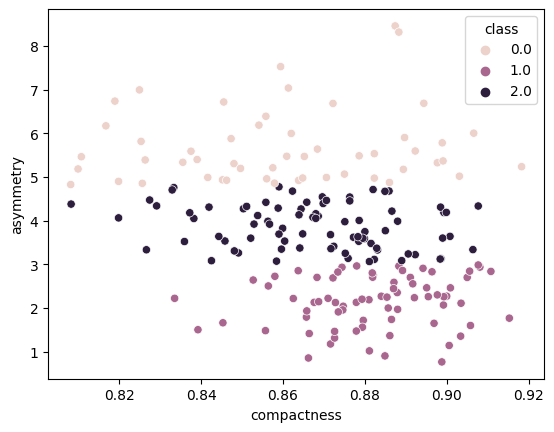

In [11]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

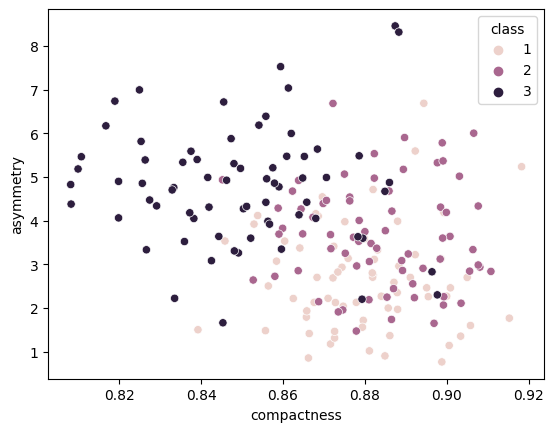

In [12]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# Higher Dimensions

In [13]:
X = df[cols[:-1]].values

In [14]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

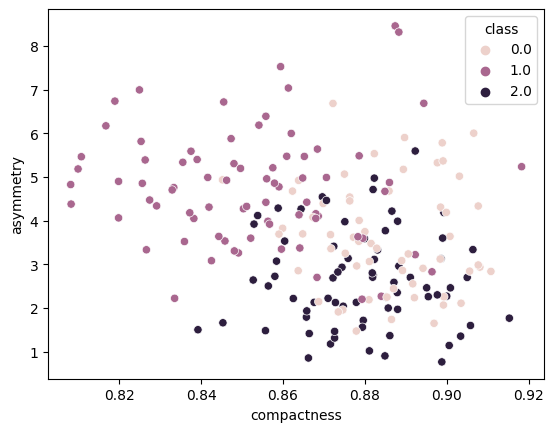

In [15]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

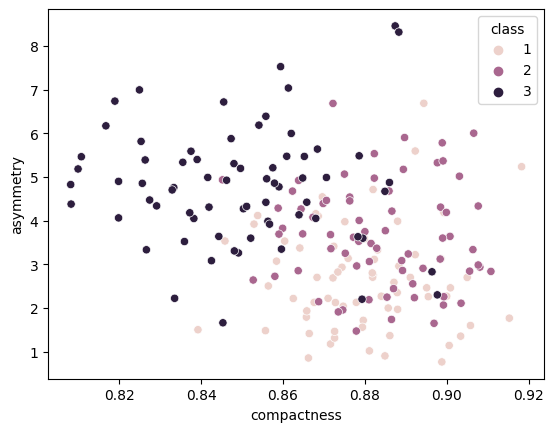

In [16]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [19]:
X.shape

(210, 7)

In [20]:
transformed_x.shape

(210, 2)

In [21]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

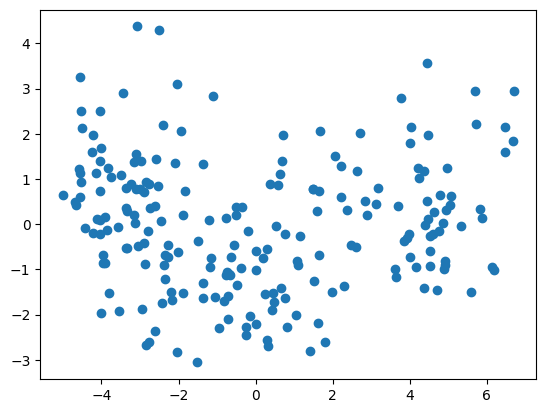

In [22]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [23]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [24]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [ ]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

In [ ]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()